## Reto 4: Regresión Lineal Simple

### 1. Objetivos:
    - Utilizar Regresión Lineal Simple para intentar hacer predicciones entre pares de variables en nuestro dataset
 
---
    
### 2. Desarrollo:

En este Reto vamos a ver qué tan buenas predicciones podemos realizar entre pares de variables de nuestro dataset 'wine_quality_red-clean.csv'. Nuestros intentos en este momento van a ser bastante básicos, puesto que el mundo de las predicciones es tan vasto y complejo, que no hay manera de aprender todos los pequeños detalles durante este curso. Pero de todas maneras, lo que harás en este momento es un gran avance hacia desarrollar la capacidad de aplicar estas herramientas en el mundo real.

Tu Reto consiste no solamente en realizar algunas Regresiones Lineales Simples, sino también en preparar un Notebook digno de ser presentado a tus compañeros y la experta. Ésta será la primera vez que hacemos algo así. No te sientas nervioso: ¡estás preparado!

Realiza los siguientes pasos:

1. Lee tu dataset y copia el código del Reto anterior a éste para tener disponible todo el trabajo que realizaste con valores atípicos.
2. Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.
3. Elige 3 pares de variables que te parezcan más prometedores para realizar predicciones.
4. Si es necesario, realiza un poco más de limpieza en esos 3 pares.
5. Por cada par, elige tu variable independiente y dependiente.
6. Crea un modelo por cada par de variables y entrénalos.
7. Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.
8. Obtén el coeficiente de determinación para cada una de tus regresiones.
9. Revisa que tu Notebook tenga lo siguiente para que esté listo para ser presentado:

  a) Todas las gráficas que realizaste tiene títulos y nombres de ejes adecuados. También tienen tamaños adecuados para poder ser leídas sin problema alguno
  
  b) Has agregado celdas markdown para explicar tus procesos, hipótesis y hallazgos.
  
  c) Has agregado una introducción y una conclusión.
  
10. Si lo deseas, presenta tu Notebook a tus compañeros y tu experta y comparte los hallazgos que hiciste.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

**Lee tu dataset y copia el código del Reto anterior a éste para tener disponible todo el trabajo que realizaste con valores atípicos.**

Cargamos el dataset original

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto wine_quality_red-clean.csv',index_col=0)
df.drop('quality',inplace=True,axis=1)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Realizamos la matriz de correlación con Heatmap

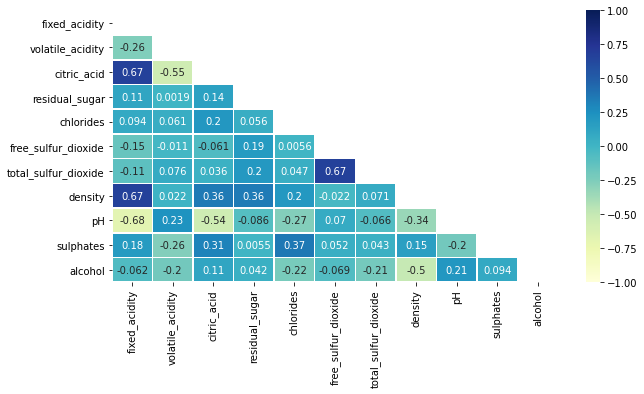

In [6]:
matriz_correlacion = df.corr()
mask = np.zeros_like(matriz_correlacion)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
ax = sns.heatmap(matriz_correlacion, mask=mask, vmin=-1,vmax=1,annot=True, cmap='YlGnBu', linewidths=.5)

Utiliza una gráfica de pares (pairplot) para graficar tus variables y asegurarte de que no se te escapó algún par de variables interesantes que no pudimos identificar con la matriz de correlaciones.

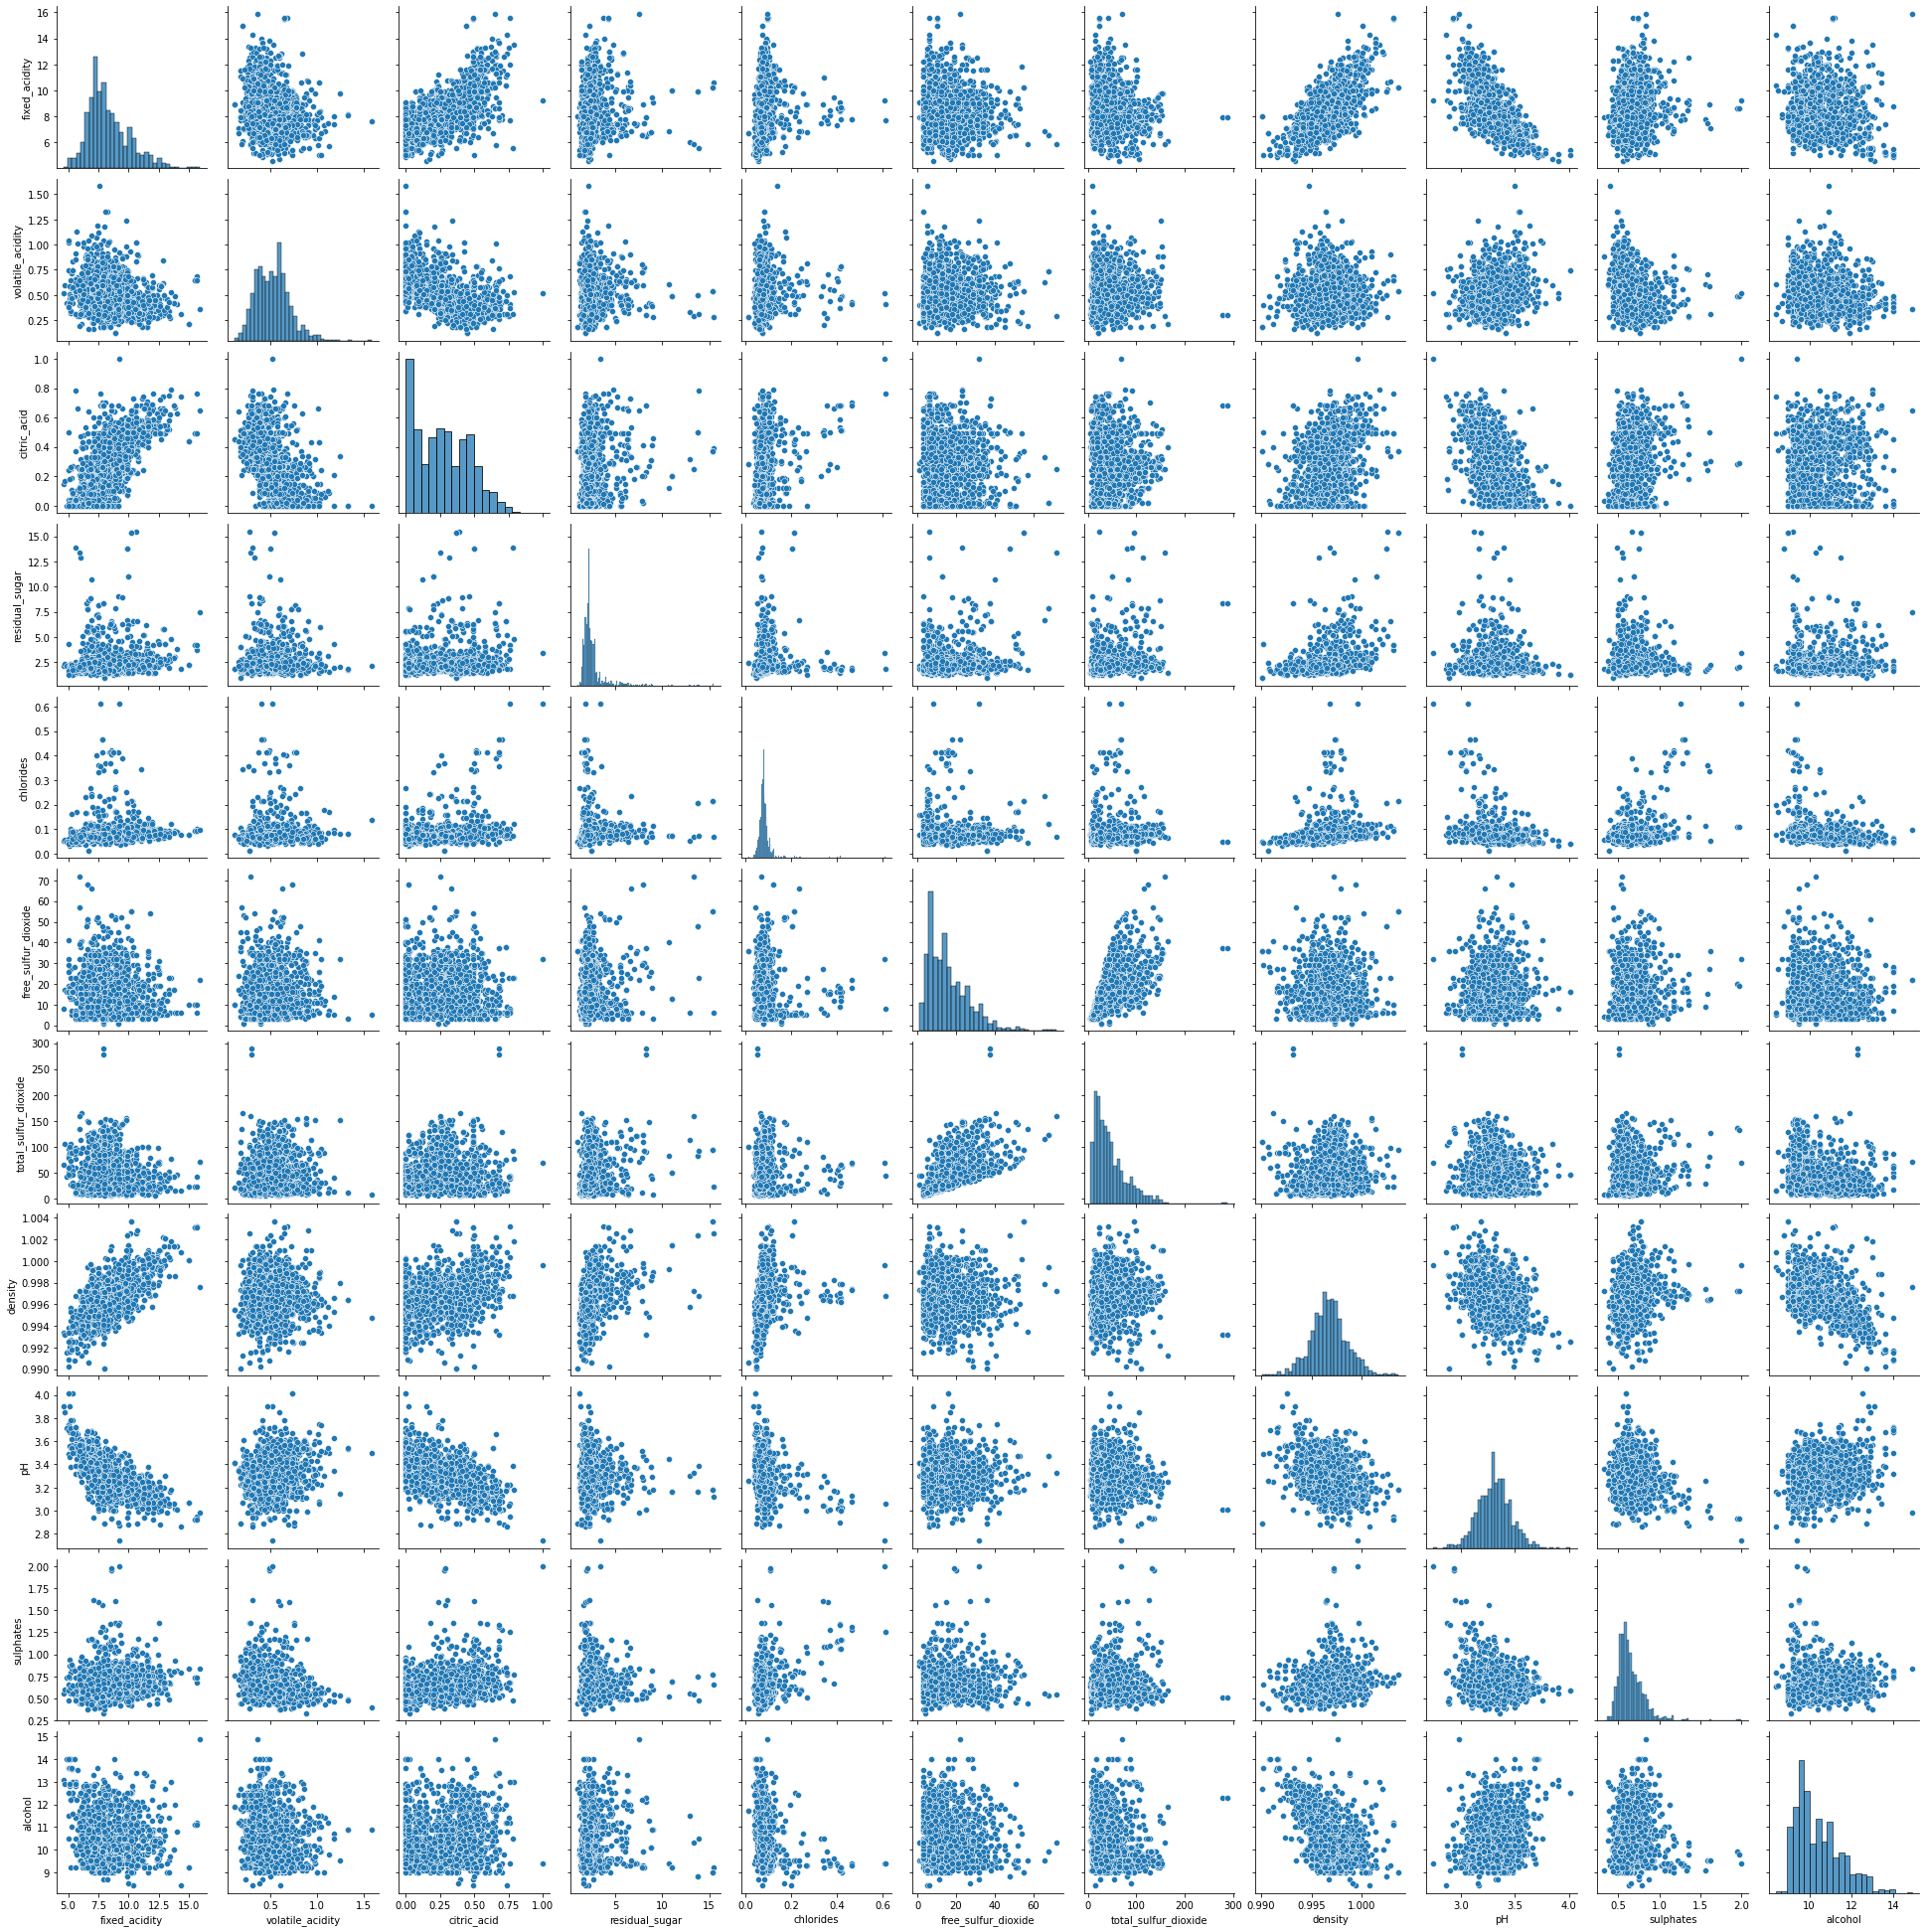

In [7]:
sns.pairplot(df)

**Elige 3 pares de variables que te parezcan más prometedores para realizar predicciones.**

pH y fixed acidity, density y alcohol, density y fixed acidity

**Si es necesario, realiza un poco más de limpieza en esos 3 pares.**

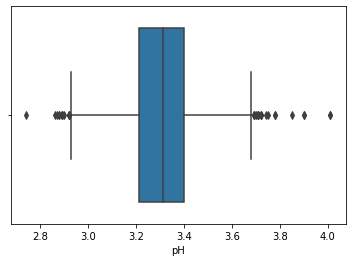

In [31]:
sns.boxplot(x=df['pH'])

In [32]:
iqr_ph = df['pH'].quantile(0.75) - df['pH'].quantile(0.25)
filtro_superior = df['pH'] < (df['pH'].quantile(.75)+ iqr_ph*1.5)
filtro_inferior = df['pH'] > (df['pH'].quantile(.25)- iqr_ph*1.5)
df_filtrado = df[filtro_inferior & filtro_superior]

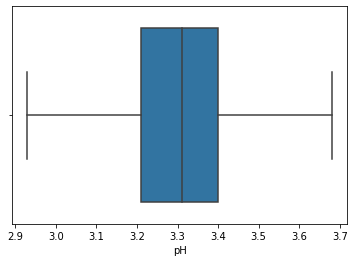

In [33]:
sns.boxplot(x=df_filtrado['pH'])

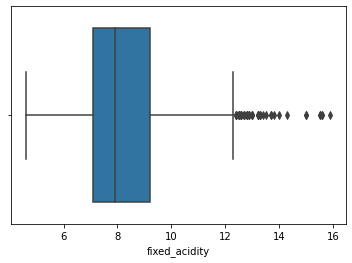

In [34]:
sns.boxplot(x=df['fixed_acidity'])

In [35]:
iqr_fixed_acidity = df['fixed_acidity'].quantile(0.75) - df['fixed_acidity'].quantile(0.25)
filtro_superior = df['fixed_acidity'] < (df['fixed_acidity'].quantile(.75)+ iqr_fixed_acidity*1.5)
filtro_inferior = df['fixed_acidity'] > (df['fixed_acidity'].quantile(.25)- iqr_fixed_acidity*1.5)
df_filtrado = df[filtro_inferior & filtro_superior]

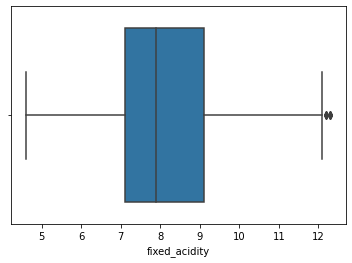

In [36]:
sns.boxplot(x=df_filtrado['fixed_acidity'])

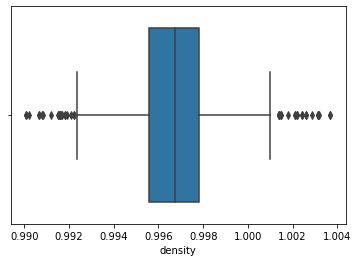

In [37]:
sns.boxplot(x=df['density'])

In [38]:
iqr_density = df['density'].quantile(0.75) - df['density'].quantile(0.25)
filtro_superior = df['density'] < (df['density'].quantile(.75)+ iqr_density*1.5)
filtro_inferior = df['density'] > (df['density'].quantile(.25)- iqr_density*1.5)
df_filtrado = df[filtro_inferior & filtro_superior]

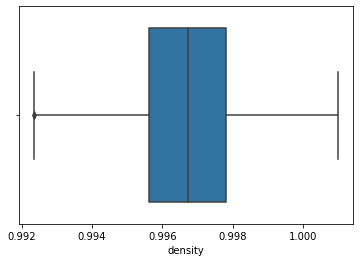

In [42]:
sns.boxplot(x=df_filtrado['density'])

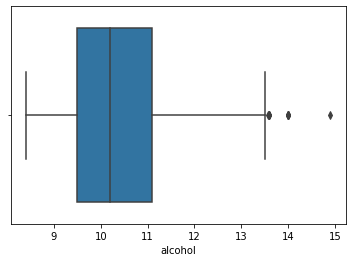

In [28]:
sns.boxplot(x=df['alcohol'])

**Por cada par, elige tu variable independiente y dependiente.**

*   independiente: fixed acidity, dependiente: pH
*   independiente: alcohol, dependiente: density
*   independiente: fixed acidity, dependiente: density

*   **Crea un modelo por cada par de variables y entrénalos.**
*   **Crea gráficas para cada par de variables donde podamos ver una gráfica de dispersión de todas las muestras y una gráfica lineal que represente cada modelo entrenado.**
*   **Obtén el coeficiente de determinación para cada una de tus regresiones.**




In [59]:
lr_1 = LinearRegression()

In [60]:
lr_1.fit(df_filtrado['fixed_acidity'].to_frame(),df_filtrado['pH'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
ph_predict = lr_1.predict(df_filtrado['fixed_acidity'].to_frame())

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Fixed Acidity vs pH')

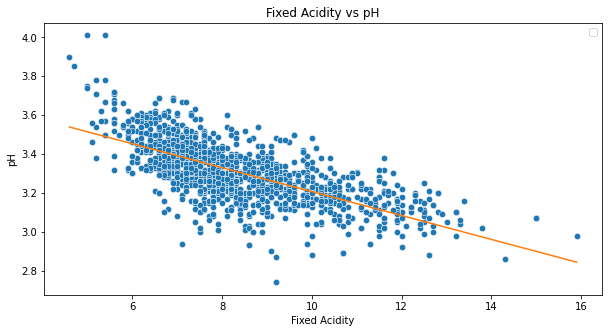

In [68]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filtrado['fixed_acidity'], y=df_filtrado['pH'], s=40);
sns.lineplot(x=df_filtrado['fixed_acidity'], y=ph_predict, color='#FF7F0E');
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH')

In [65]:
intercept = lr_1.intercept_
coefficient = lr_1.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = -0.061475567682783054 * x + 3.8217688784745354


In [78]:
lr_1.score(df_filtrado['fixed_acidity'].to_frame(), df_filtrado['pH'])

0.4542988974219493

In [73]:
lr_2 = LinearRegression()
lr_2.fit(df_filtrado['alcohol'].to_frame(),df_filtrado['density'])
density_predict = lr_2.predict(df_filtrado['alcohol'].to_frame())

Text(0.5, 1.0, 'Alcohol vs Densidad')

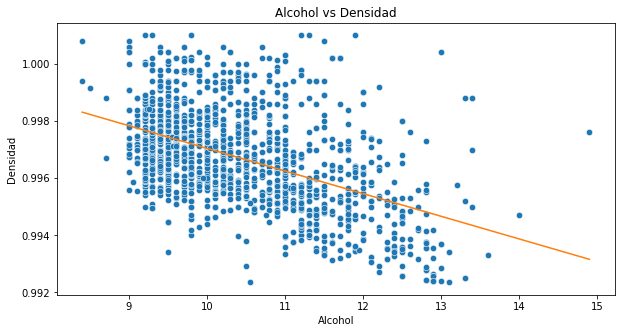

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filtrado['alcohol'], y=df_filtrado['density'], s=40);
sns.lineplot(x=df_filtrado['alcohol'], y=density_predict, color='#FF7F0E');
plt.xlabel('Alcohol')
plt.ylabel('Densidad')
plt.title('Alcohol vs Densidad')

In [76]:
intercept = lr_2.intercept_
coefficient = lr_2.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = -0.0007926294186618393 * x + 1.0049692992052635


In [77]:
lr_2.score(df_filtrado['alcohol'].to_frame(), df_filtrado['density'])

0.234701135094065

In [79]:
lr_3 = LinearRegression()
lr_3.fit(df_filtrado['fixed_acidity'].to_frame(),df_filtrado['density'])
density_predict_2 = lr_3.predict(df_filtrado['fixed_acidity'].to_frame())

Text(0.5, 1.0, 'Fixed Acidity vs Densidad')

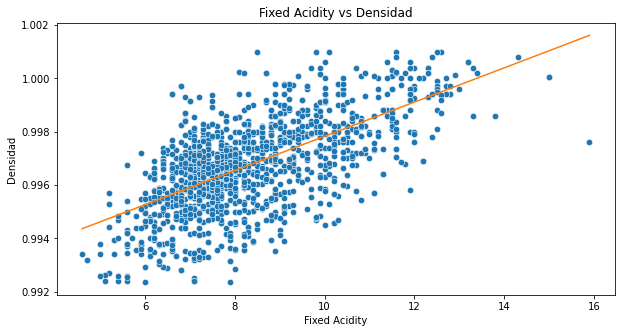

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filtrado['fixed_acidity'], y=df_filtrado['density'], s=40);
sns.lineplot(x=df_filtrado['fixed_acidity'], y=density_predict_2, color='#FF7F0E');
plt.xlabel('Fixed Acidity')
plt.ylabel('Densidad')
plt.title('Fixed Acidity vs Densidad')

In [81]:
intercept = lr_3.intercept_
coefficient = lr_3.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = 0.000641536328503572 * x + 0.991415238258429


In [82]:
lr_3.score(df_filtrado['fixed_acidity'].to_frame(), df_filtrado['density'])

0.40162271877425515